In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d alsaniipe/flowers-dataset

 68% 41.0M/60.5M [00:01<00:00, 34.4MB/s]
100% 60.5M/60.5M [00:01<00:00, 49.7MB/s]


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir


--2023-12-20 02:37:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-12-20 02:37:04 (15.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
unzip_data(
  '/content/flowers-dataset.zip'
)

In [ ]:
walk_through_dir(
    '/content/test'
)

There are 2 directories and 0 images in '/content/test'.
There are 0 directories and 105 images in '/content/test/dandelion'.
There are 0 directories and 77 images in '/content/test/daisy'.


In [ ]:
walk_through_dir(
    '/content/train'
)

There are 2 directories and 0 images in '/content/train'.
There are 0 directories and 746 images in '/content/train/dandelion'.
There are 0 directories and 529 images in '/content/train/daisy'.


In [ ]:
import os
import shutil
import random

# Set the percentage of data to select (1% in this case)
percentage = 10

def select_percentage_of_data(src_dir, dest_dir, percentage):
    # Get the list of subdirectories (each subdirectory represents a fruit category)
    categories = os.listdir(src_dir)

    # Create the destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    # Iterate over each fruit category
    for category in categories:
        category_src_dir = os.path.join(src_dir, category)
        category_dest_dir = os.path.join(dest_dir, category)

        # Get the list of all files in the current category
        all_files = os.listdir(category_src_dir)

        # Calculate the number of files to select based on the percentage
        num_files_to_select = int(len(all_files) * (percentage / 100))

        # Randomly select files
        selected_files = random.sample(all_files, num_files_to_select)

        # Create the destination directory for the current category
        os.makedirs(category_dest_dir, exist_ok=True)

        # Copy selected files to the destination directory
        for file in selected_files:
            src_path = os.path.join(category_src_dir, file)
            dest_path = os.path.join(category_dest_dir, file)
            shutil.copy(src_path, dest_path)

# # Specify the directories
# selected_train_dir = '/content/selected_car_signs_images/Training'
# selected_test_dir = '/content/selected_car_signs_images/Test'

# # Specify the original train and test directories
# train_dir = '/content/Car-Signs/train'
# test_dir = '/content/Car-Signs/test'

# # Select 1% of the data for training
# select_percentage_of_data(train_dir, selected_train_dir, percentage)

# # Select 1% of the data for testing
# select_percentage_of_data(test_dir, selected_test_dir, percentage)


In [ ]:
train_dir= '/content/train'
test_dir = '/content/test'

In [85]:
# prompt: use from tensorflow ImageDataGenerator to create a train and test generators

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 1275 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


In [86]:
len(test_generator)

6

In [ ]:
# prompt: create a model architecture using Functional API from tensorflow and dropout layers

from tensorflow.keras import layers
from tensorflow.keras.models import Model

def create_model():
  # Define the input layer
  input_layer = layers.Input(shape=(224, 224, 3))

  # Define the first convolutional block
  x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Dropout(0.2)(x)

  # Define the second convolutional block
  x = layers.Conv2D(64, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Dropout(0.2)(x)

  # Define the third convolutional block
  x = layers.Conv2D(128, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Dropout(0.2)(x)

  # Define the fourth convolutional block
  x = layers.Conv2D(256, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Dropout(0.2)(x)

  # Define the fifth convolutional block
  x = layers.Conv2D(512, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Dropout(0.2)(x)

  # Flatten the output of the convolutional blocks
  x = layers.Flatten()(x)

  # Define the fully connected layers
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  output_layer = layers.Dense(2, activation='softmax')(x)

  # Create the model
  model = Model(inputs=input_layer, outputs=output_layer)

  return model

model_1 = create_model()

In [ ]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                     

In [ ]:
# prompt: compile model_!

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# prompt: fit model

history = model_1.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)


Epoch 1/10
40/40 [==============================] - 28s 515ms/step - loss: 0.8274 - accuracy: 0.5631 - val_loss: 0.6871 - val_accuracy: 0.5769
Epoch 2/10
40/40 [==============================] - 22s 551ms/step - loss: 0.6774 - accuracy: 0.5851 - val_loss: 0.6718 - val_accuracy: 0.5769
Epoch 3/10
40/40 [==============================] - 20s 489ms/step - loss: 0.6544 - accuracy: 0.5953 - val_loss: 0.6495 - val_accuracy: 0.5934
Epoch 4/10
40/40 [==============================] - 19s 486ms/step - loss: 0.6491 - accuracy: 0.6235 - val_loss: 0.5387 - val_accuracy: 0.7582
Epoch 5/10
40/40 [==============================] - 21s 535ms/step - loss: 0.5402 - accuracy: 0.7396 - val_loss: 0.5275 - val_accuracy: 0.7747
Epoch 6/10
40/40 [==============================] - 22s 543ms/step - loss: 0.4886 - accuracy: 0.7780 - val_loss: 0.4257 - val_accuracy: 0.8352
Epoch 7/10
40/40 [==============================] - 19s 479ms/step - loss: 0.4651 - accuracy: 0.7875 - val_loss: 0.4961 - val_accuracy: 0.8187

In [ ]:
# prompt: evaluate model_1_results

model_1_results = model_1.evaluate(test_generator)
print(model_1_results)


6/6 [==============================] - 1s 81ms/step - loss: 0.3440 - accuracy: 0.8846
[0.3440481424331665, 0.8846153616905212]


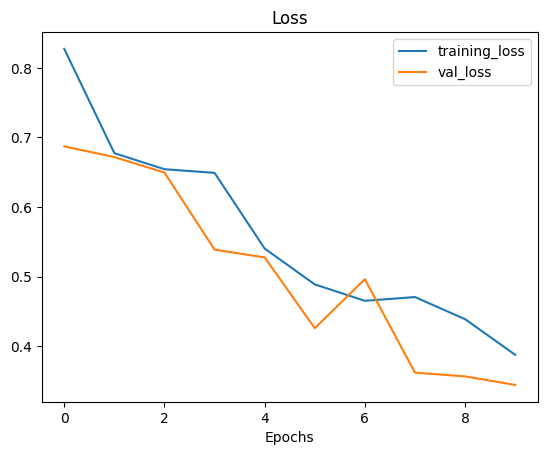

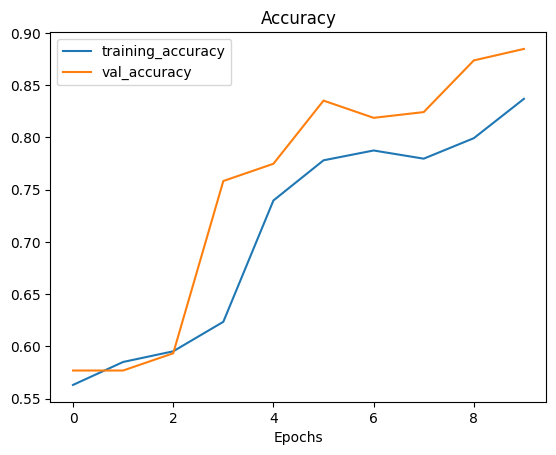

In [ ]:
plot_loss_curves(history)

In [ ]:
# prompt: create model_2 using EfficientNetB0


model_2 = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# Freeze the weights of the base model
for layer in model_2.layers:
    layer.trainable = False

# Add a global average pooling layer
x = model_2.output
x = layers.GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output_layer = layers.Dense(2, activation='softmax')(x)

# Create the model
model_2 = Model(inputs=model_2.input, outputs=output_layer)

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)



16705208/16705208 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)   

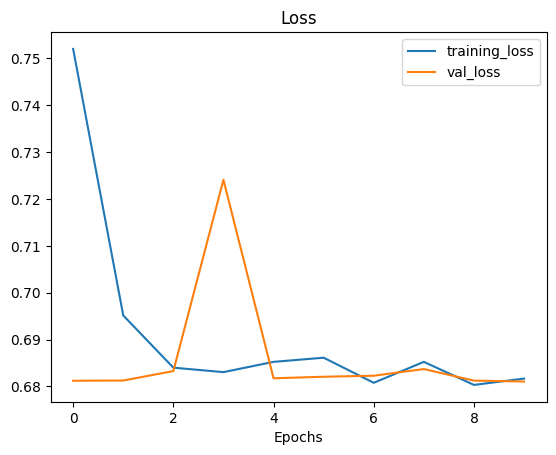

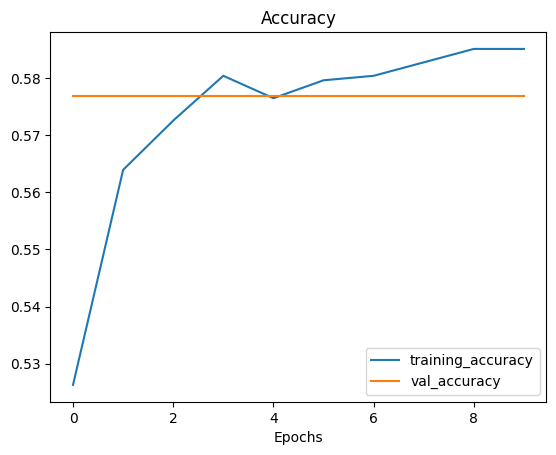

In [ ]:
plot_loss_curves(history_2)

Epoch 1/10
40/40 [==============================] - 27s 515ms/step - loss: 0.7163 - accuracy: 0.5631 - val_loss: 0.6741 - val_accuracy: 0.5769
Epoch 2/10
40/40 [==============================] - 19s 483ms/step - loss: 0.6789 - accuracy: 0.5796 - val_loss: 0.6758 - val_accuracy: 0.5769
Epoch 3/10
40/40 [==============================] - 21s 520ms/step - loss: 0.6631 - accuracy: 0.5757 - val_loss: 0.6117 - val_accuracy: 0.5769
Epoch 4/10
40/40 [==============================] - 20s 502ms/step - loss: 0.6051 - accuracy: 0.6635 - val_loss: 0.5558 - val_accuracy: 0.7308
Epoch 5/10
40/40 [==============================] - 21s 512ms/step - loss: 0.5013 - accuracy: 0.7506 - val_loss: 0.4606 - val_accuracy: 0.8077
Epoch 6/10
40/40 [==============================] - 19s 477ms/step - loss: 0.4703 - accuracy: 0.7851 - val_loss: 0.4923 - val_accuracy: 0.7967
Epoch 7/10
40/40 [==============================] - 21s 518ms/step - loss: 0.4487 - accuracy: 0.8071 - val_loss: 0.4270 - val_accuracy: 0.8187

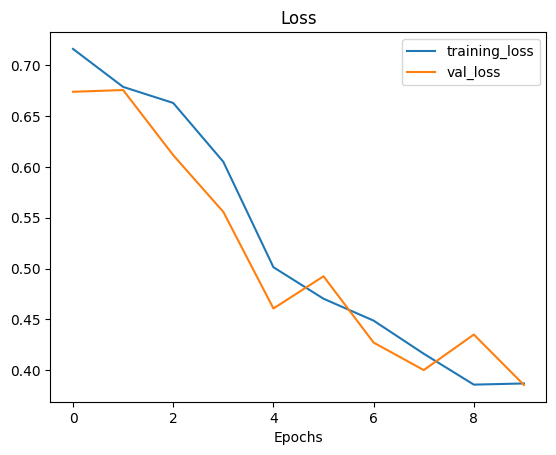

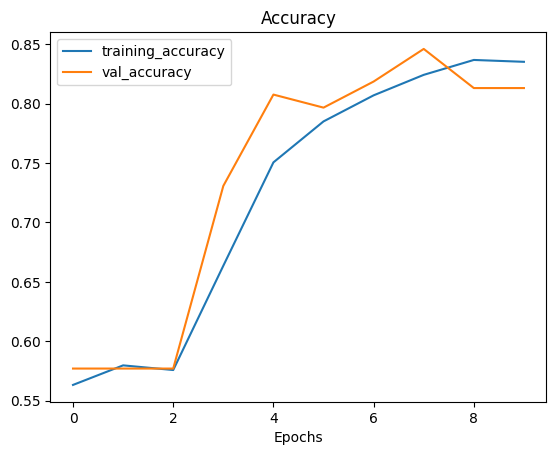

In [71]:
# prompt: create a model_3 with more layers

model_3 = create_model()

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history_3 = model_3.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)


model_3_results = model_3.evaluate(test_generator)
print(model_3_results)

plot_loss_curves(history_3)


In [74]:
pred_probs = model_3.predict(test_generator, verbose=1) # set verbosity to see how long it will take
pred_probs

6/6 [==============================] - 1s 112ms/step


array([[9.90648687e-01, 9.35134385e-03],
       [5.76395512e-01, 4.23604518e-01],
       [1.59438350e-03, 9.98405635e-01],
       [9.97575223e-01, 2.42473651e-03],
       [9.56462417e-03, 9.90435362e-01],
       [5.01279766e-03, 9.94987249e-01],
       [1.13035128e-01, 8.86964917e-01],
       [3.50801766e-01, 6.49198174e-01],
       [9.63413436e-03, 9.90365863e-01],
       [3.80879967e-04, 9.99619126e-01],
       [9.71032772e-03, 9.90289629e-01],
       [8.08670931e-03, 9.91913319e-01],
       [9.66344118e-01, 3.36558782e-02],
       [1.10760573e-02, 9.88923967e-01],
       [1.04811881e-03, 9.98951912e-01],
       [9.60751530e-03, 9.90392566e-01],
       [9.57143426e-01, 4.28566076e-02],
       [9.82908607e-01, 1.70913972e-02],
       [9.55134351e-03, 9.90448654e-01],
       [1.29039250e-02, 9.87096071e-01],
       [3.57330730e-03, 9.96426642e-01],
       [9.58002731e-03, 9.90420043e-01],
       [9.98685777e-01, 1.31426647e-03],
       [9.58378240e-03, 9.90416169e-01],
       [9.995099

In [75]:

# What's the shape of our predictions?
pred_probs.shape

(182, 2)

In [76]:
pred_probs[:10]

array([[9.9064869e-01, 9.3513438e-03],
       [5.7639551e-01, 4.2360452e-01],
       [1.5943835e-03, 9.9840564e-01],
       [9.9757522e-01, 2.4247365e-03],
       [9.5646242e-03, 9.9043536e-01],
       [5.0127977e-03, 9.9498725e-01],
       [1.1303513e-01, 8.8696492e-01],
       [3.5080177e-01, 6.4919817e-01],
       [9.6341344e-03, 9.9036586e-01],
       [3.8087997e-04, 9.9961913e-01]], dtype=float32)

In [103]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

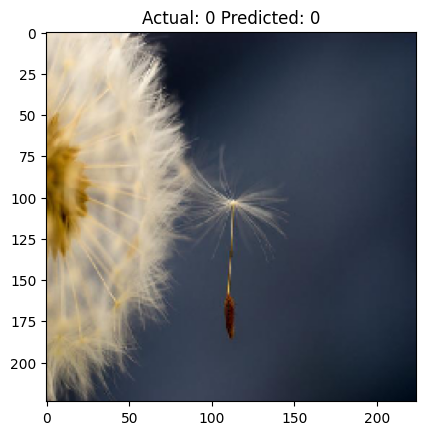

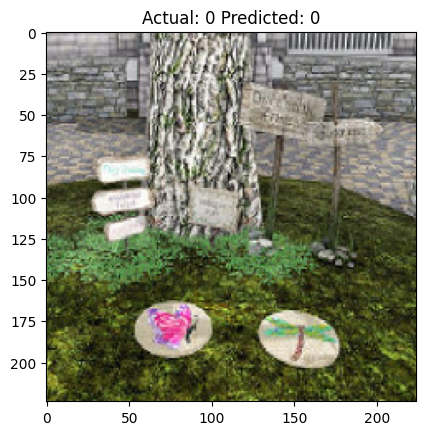

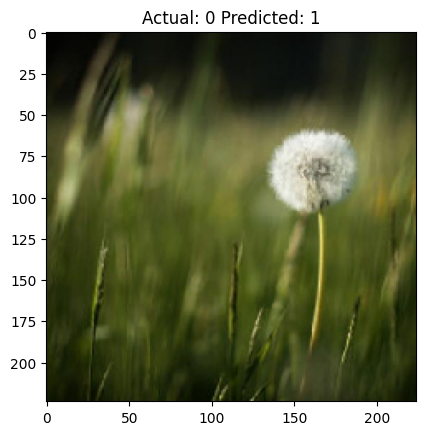

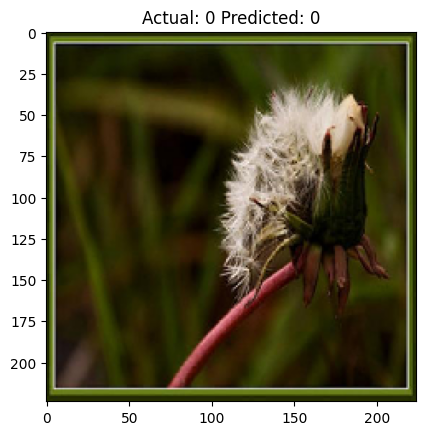

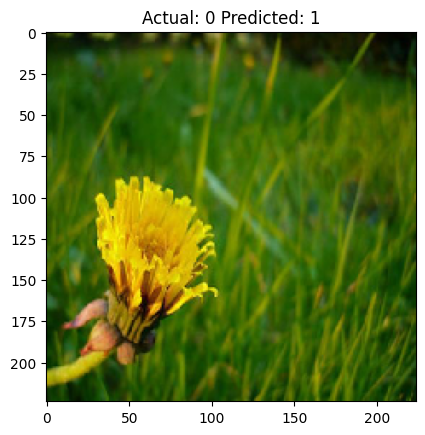

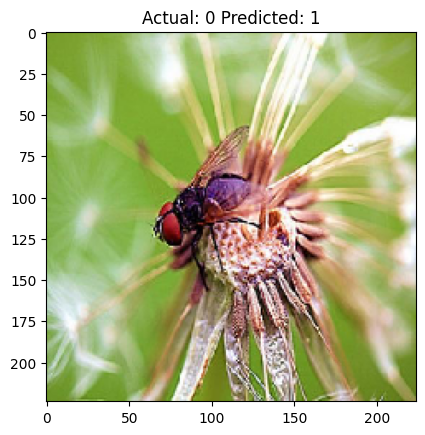

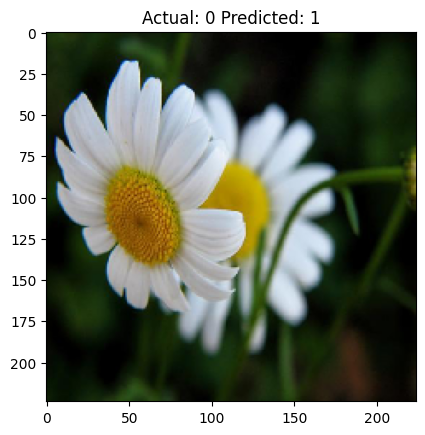

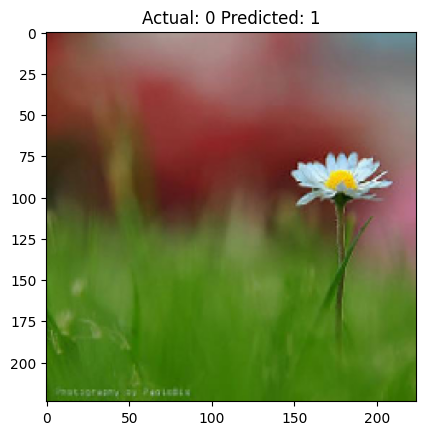

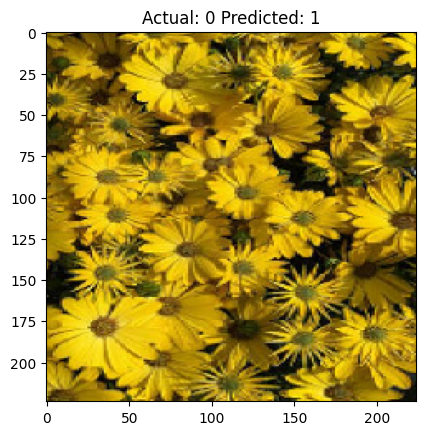

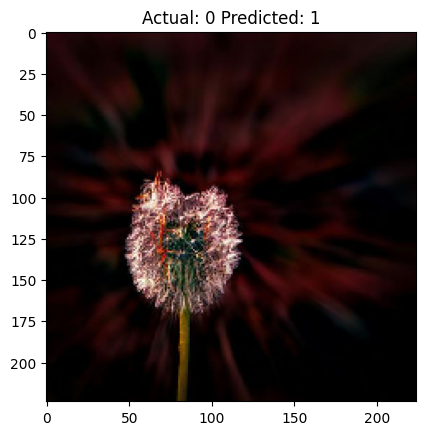

In [102]:
# prompt: make predictions with model_3 on the test data and plot each iamge where i can see the actual label and prediction

for index in range(10):
  plt.imshow(test_generator.next()[0][index])
  plt.title(f'Actual: {test_generator.classes[index]} Predicted: {pred_classes[index]}')
  plt.show()


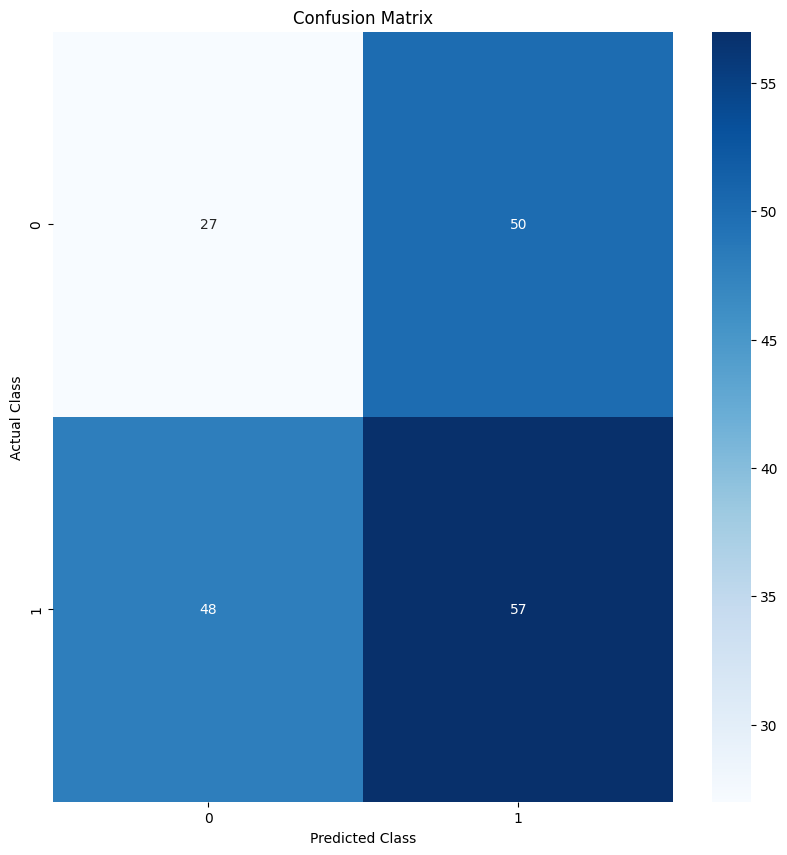

In [87]:
# prompt: createa  confusion matrix with model 3

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
confusion_matrix = confusion_matrix(test_generator.classes, pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, cmap='Blues', annot=True)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()


In [82]:
len(test_generator)

6

In [95]:

# Get a sample of the training data batch
images, labels = train_generator.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [97]:
class_names = ['daisy', 'dandelion']

In [99]:

# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred_probs)[0][0])]
pred_class

'dandelion'

1/1 [==============================] - 0s 28ms/step


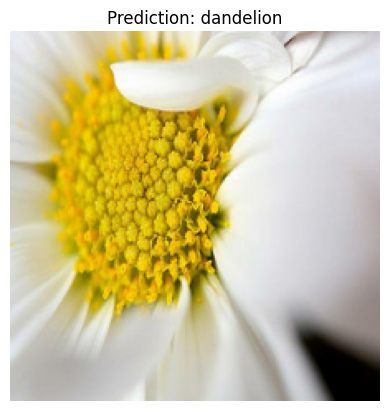

In [101]:
from helper_functions import load_and_prep_image
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

# Test our model on a custom image
pred_and_plot(model_3, "/content/valid/daisy/16291797949_a1b1b7c2bd_n_jpg.rf.dea8f63ec1fc40cd763eac5780f80050.jpg", class_names)